In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import warnings
warnings.simplefilter(action='ignore')


In [2]:

# Load the dataset
data = pd.read_csv(r'orginal diabetes.csv')  # Update with the correct file path

# Rename the target column for consistency
data.rename(columns={'Diabetes_012': 'Outcome'}, inplace=True)

In [43]:
data.shape

(253680, 22)

In [9]:
data.head()

,Outcome,a.HighBP,b.HighChol,c.CholCheck,d.BMI,e.Smoker,f.Stroke,g.HeartDiseaseorAttack,h.PhysActivity,i.Fruits,...,l.AnyHealthcare,m.NoDocbcCost,n.GenHlth,o.MentHlth,p.PhysHlth,q.DiffWalk,r.Sex,s.Age,t.Education,u.Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Outcome                 253680 non-null  int64
 1   a.HighBP                253680 non-null  int64
 2   b.HighChol              253680 non-null  int64
 3   c.CholCheck             253680 non-null  int64
 4   d.BMI                   253680 non-null  int64
 5   e.Smoker                253680 non-null  int64
 6   f.Stroke                253680 non-null  int64
 7   g.HeartDiseaseorAttack  253680 non-null  int64
 8   h.PhysActivity          253680 non-null  int64
 9   i.Fruits                253680 non-null  int64
 10  j.Veggies               253680 non-null  int64
 11  k.HvyAlcoholConsump     253680 non-null  int64
 12  l.AnyHealthcare         253680 non-null  int64
 13  m.NoDocbcCost           253680 non-null  int64
 14  n.GenHlth               253680 non-null  int64
 15  

In [45]:
data.columns

Index(['Outcome', 'a.HighBP', 'b.HighChol', 'c.CholCheck', 'd.BMI', 'e.Smoker',
       'f.Stroke', 'g.HeartDiseaseorAttack', 'h.PhysActivity', 'i.Fruits',
       'j.Veggies', 'k.HvyAlcoholConsump', 'l.AnyHealthcare', 'm.NoDocbcCost',
       'n.GenHlth', 'o.MentHlth', 'p.PhysHlth', 'q.DiffWalk', 'r.Sex', 's.Age',
       't.Education', 'u.Income'],
      dtype='object')

In [4]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Outcome,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
a.HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
b.HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
c.CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
d.BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
e.Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
f.Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
g.HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
h.PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
i.Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [5]:
data['Outcome'].value_counts()*100/len(data)

Outcome
0    84.241170
2    13.933302
1     1.825528
Name: count, dtype: float64

<Axes: xlabel='s.Age', ylabel='Count'>

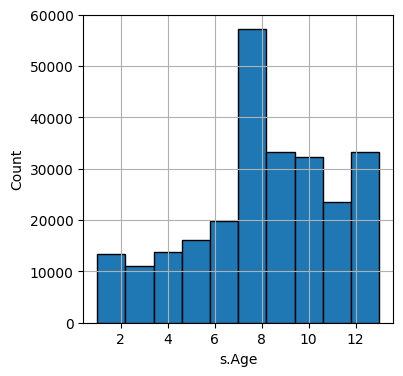

In [6]:
import matplotlib.pyplot as plt
#max and mini ages in histogram
plt.figure(figsize=(4,4))
plt.xlabel('s.Age',fontsize=10)
plt.ylabel('Count',fontsize=10)
data['s.Age'].hist(edgecolor='black')

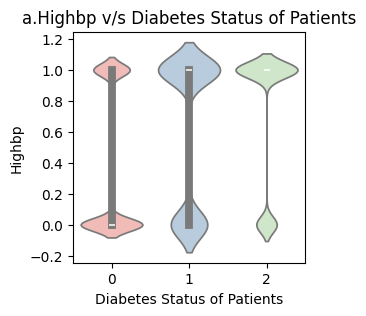

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='a.HighBP', data=data, palette='Pastel1')
plt.title('a.Highbp v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients')
plt.ylabel('Highbp')
plt.show()

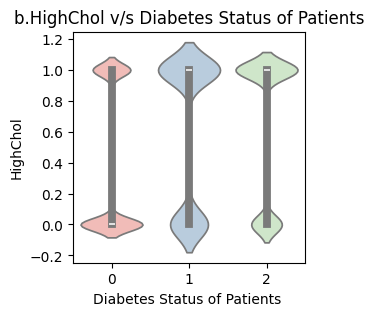

In [8]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='b.HighChol', data=data, palette='Pastel1')
plt.title('b.HighChol v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('HighChol')
plt.show()

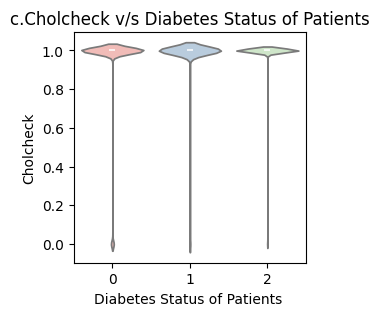

In [9]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='c.CholCheck', data=data, palette='Pastel1')
plt.title('c.Cholcheck v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('Cholcheck')
plt.show()

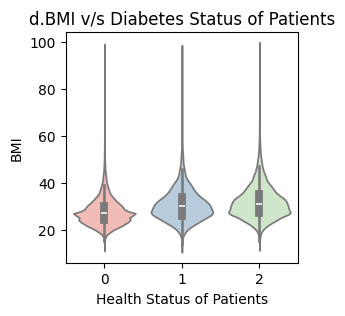

In [10]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='d.BMI', data=data, palette='Pastel1')
plt.title('d.BMI v/s Diabetes Status of Patients')
plt.xlabel('Health Status of Patients')
plt.ylabel('BMI')
plt.show()

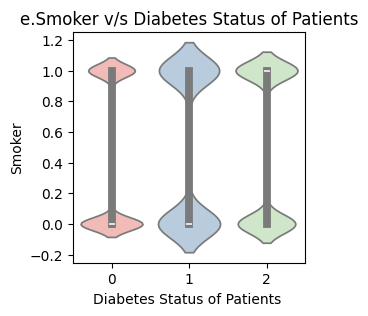

In [11]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='e.Smoker', data=data, palette='Pastel1')
plt.title('e.Smoker v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('Smoker')
plt.show()

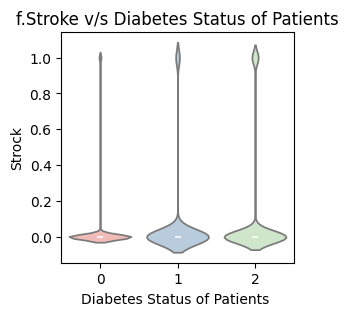

In [12]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='f.Stroke', data=data, palette='Pastel1')
plt.title('f.Stroke v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('Strock')
plt.show()

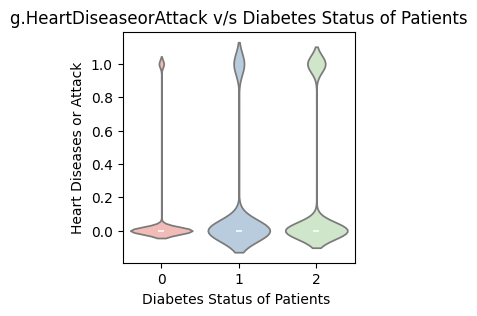

In [13]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='g.HeartDiseaseorAttack', data=data, palette='Pastel1')
plt.title('g.HeartDiseaseorAttack v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('Heart Diseases or Attack')
plt.show()

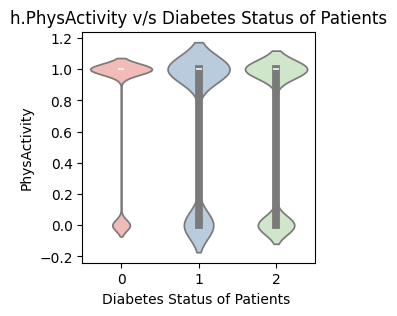

In [14]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='h.PhysActivity', data=data, palette='Pastel1')
plt.title('h.PhysActivity v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('PhysActivity')
plt.show()

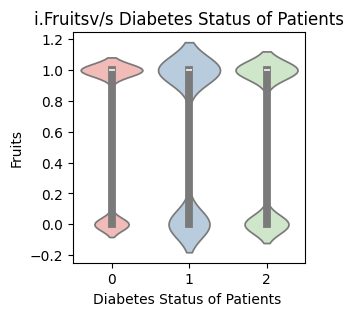

In [15]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='i.Fruits', data=data, palette='Pastel1')
plt.title('i.Fruitsv/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('Fruits')
plt.show()

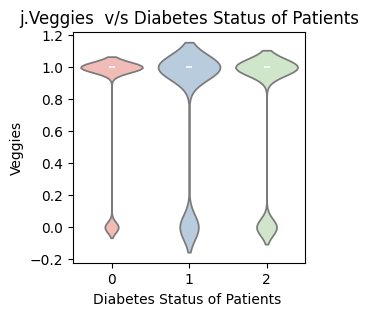

In [16]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='j.Veggies', data=data, palette='Pastel1')
plt.title('j.Veggies  v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('Veggies')
plt.show()

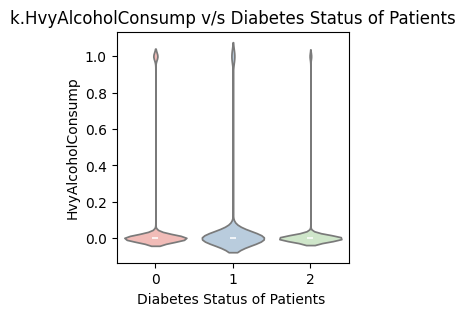

In [17]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='k.HvyAlcoholConsump', data=data, palette='Pastel1')
plt.title('k.HvyAlcoholConsump v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('HvyAlcoholConsump')
plt.show()

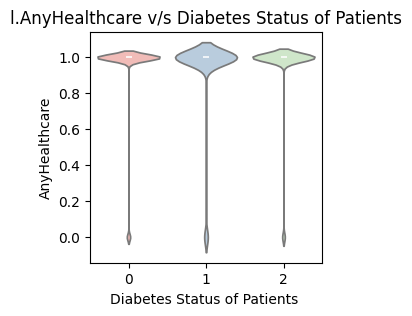

In [18]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='l.AnyHealthcare', data=data, palette='Pastel1')
plt.title('l.AnyHealthcare v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('AnyHealthcare')
plt.show()

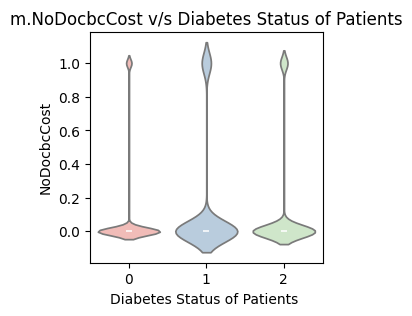

In [19]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='m.NoDocbcCost', data=data, palette='Pastel1')
plt.title('m.NoDocbcCost v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('NoDocbcCost')
plt.show()

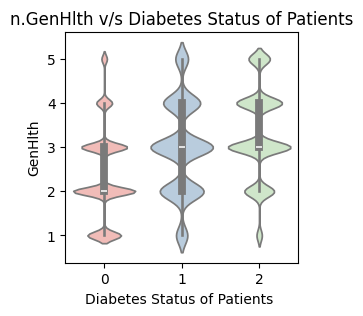

In [20]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='n.GenHlth', data=data, palette='Pastel1')
plt.title('n.GenHlth v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('GenHlth')
plt.show()

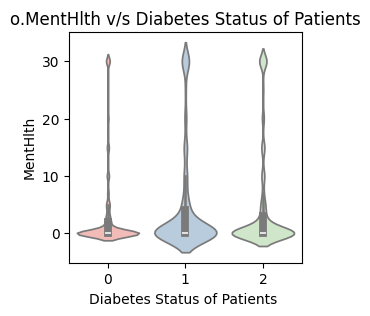

In [21]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='o.MentHlth', data=data, palette='Pastel1')
plt.title('o.MentHlth v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('MentHlth')
plt.show()

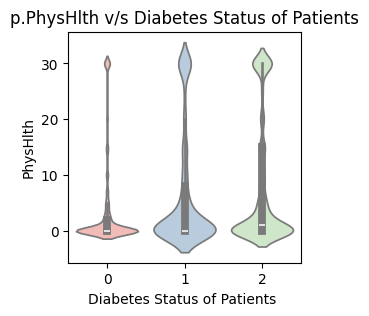

In [22]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='p.PhysHlth', data=data, palette='Pastel1')
plt.title('p.PhysHlth v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('PhysHlth')
plt.show()

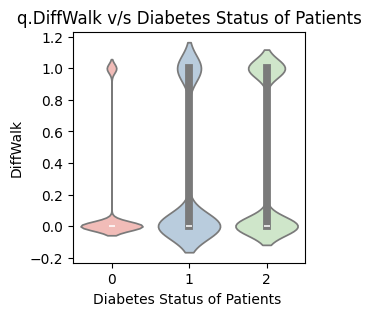

In [23]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='q.DiffWalk', data=data, palette='Pastel1')
plt.title('q.DiffWalk v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('DiffWalk')
plt.show()

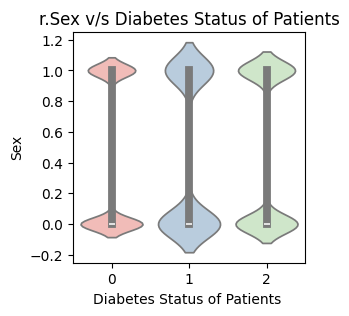

In [24]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='r.Sex', data=data, palette='Pastel1')
plt.title('r.Sex v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('Sex')
plt.show()

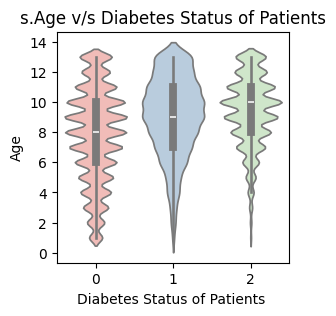

In [25]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='s.Age', data=data, palette='Pastel1')
plt.title('s.Age v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('Age')
plt.show()


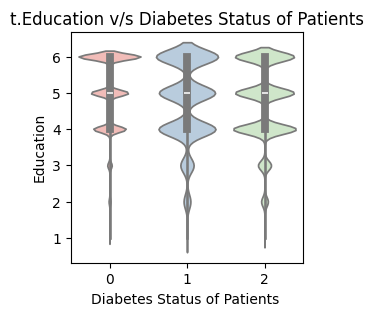

In [26]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='t.Education', data=data, palette='Pastel1')
plt.title('t.Education v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('Education')
plt.show()

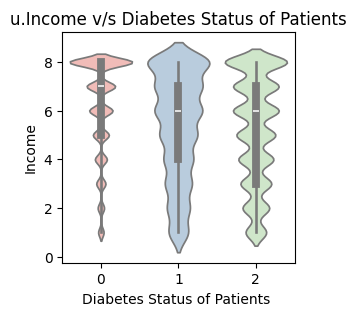

In [27]:
# Create the violin plot
plt.figure(figsize=(3,3))
sns.violinplot(x='Outcome', y='u.Income', data=data, palette='Pastel1')
plt.title('u.Income v/s Diabetes Status of Patients')
plt.xlabel('Diabetes Status of Patients ')
plt.ylabel('Income')
plt.show()

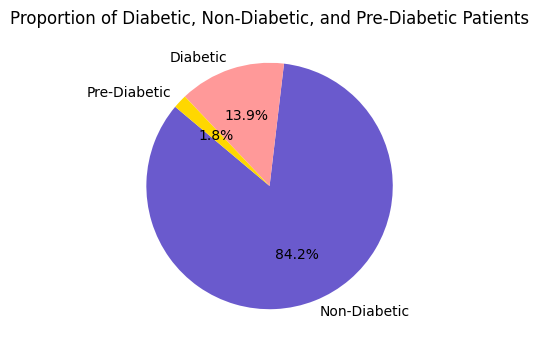

In [28]:
import matplotlib.pyplot as plt
# Calculate the proportion of each outcome
outcome_counts = data['Outcome'].value_counts()

# Update the labels to include all possible outcomes
outcome_labels = ['Non-Diabetic', 'Diabetic', 'Pre-Diabetic']

# Create the pie chart
plt.figure(figsize=(4,4))
plt.pie(outcome_counts, labels=outcome_labels, autopct='%1.1f%%', colors=['#6A5ACD', '#FF9999', '#FFD700'], startangle=140)
plt.title('Proportion of Diabetic, Non-Diabetic, and Pre-Diabetic Patients')
plt.show()

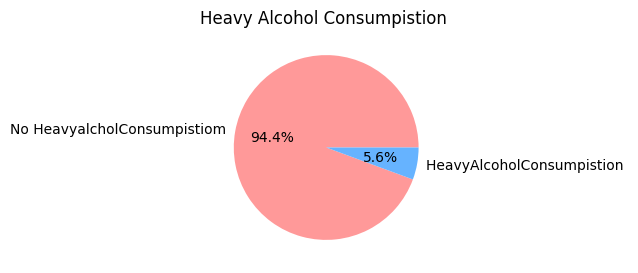

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Calculate the proportions for Cholesterol Check
drinker_counts = data['HvyAlcoholConsump'].value_counts(normalize=True) * 100

# Create labels for the pie chart
labels = ['No HeavyalcholConsumpistiom', 'HeavyAlcoholConsumpistion ']
plt.figure(figsize=(3,3))
# Create the pie chart
plt.pie(drinker_counts, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Heavy Alcohol Consumpistion ")
plt.show()


<Figure size 200x200 with 0 Axes>

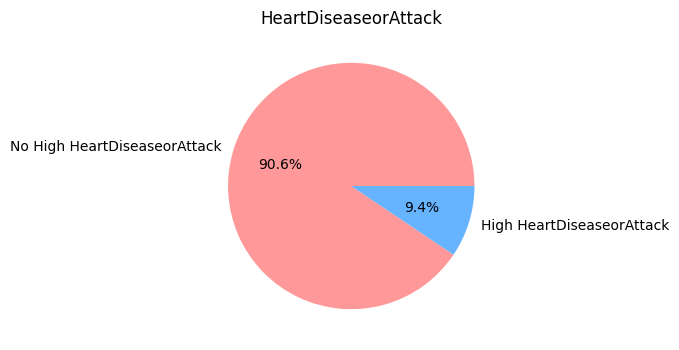

In [ ]:
# Calculate the proportions for Cholesterol Check
cholesterol_counts = data['HeartDiseaseorAttack'].value_counts(normalize=True) * 100
plt.figure(figsize=(2,2))
# Create labels for the pie chart
labels = ['No High HeartDiseaseorAttack', 'High HeartDiseaseorAttack']
plt.figure(figsize=(4,4))
# Create the pie chart
plt.pie(cholesterol_counts, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("HeartDiseaseorAttack")
plt.show()

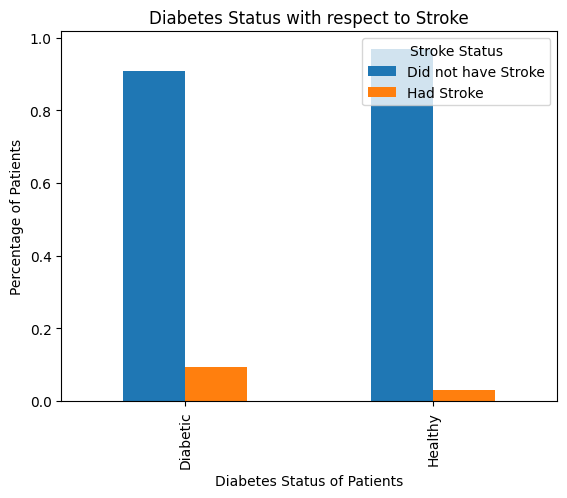

<Figure size 200x200 with 0 Axes>

In [ ]:

# Filter out prediabetes (value 1 in Diabetes_012)
filtered_data = data[data['Outcome'] != 1]

# Map diabetes status and stroke status to human-readable categories
filtered_data['Diabetes Status'] = filtered_data['Outcome'].map({0: 'Healthy', 2: 'Diabetic'})
filtered_data['Stroke Status'] = filtered_data['Stroke'].map({0: 'Did not have Stroke', 1: 'Had Stroke'})

# Calculate the percentage of each category
percentage_data = filtered_data.groupby(['Diabetes Status', 'Stroke Status']).size().reset_index(name='Count')
total_counts = filtered_data['Diabetes Status'].value_counts().to_dict()
percentage_data['Percentage'] = percentage_data.apply(lambda row: row['Count'] / total_counts[row['Diabetes Status']], axis=1)

# Pivot the data for easier plotting
pivot_data = percentage_data.pivot(index='Diabetes Status', columns='Stroke Status', values='Percentage')

# Plot the data
pivot_data.plot(kind='bar')
plt.title('Diabetes Status with respect to Stroke')
plt.xlabel('Diabetes Status of Patients')
plt.ylabel('Percentage of Patients')
plt.legend(title='Stroke Status')
plt.figure(figsize=(2,2))
plt.show()


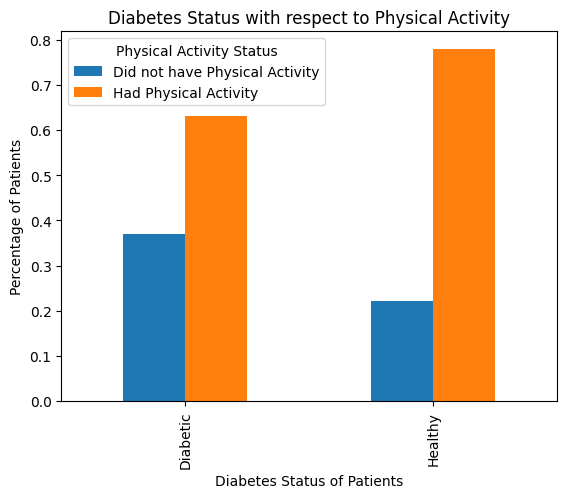

<Figure size 200x200 with 0 Axes>

In [ ]:

# Filter out prediabetes (value 1 in Diabetes_012)
filtered_data = data[data['Outcome'] != 1]

# Map diabetes status and physical activity status to human-readable categories
filtered_data['Diabetes Status'] = filtered_data['Outcome'].map({0: 'Healthy', 2: 'Diabetic'})
filtered_data['Physical Activity Status'] = filtered_data['PhysActivity'].map({0: 'Did not have Physical Activity', 1: 'Had Physical Activity'})

# Calculate the percentage of each category
percentage_data = filtered_data.groupby(['Diabetes Status', 'Physical Activity Status']).size().reset_index(name='Count')
total_counts = filtered_data['Diabetes Status'].value_counts().to_dict()
percentage_data['Percentage'] = percentage_data.apply(lambda row: row['Count'] / total_counts[row['Diabetes Status']], axis=1)

# Pivot the data for easier plotting
pivot_data = percentage_data.pivot(index='Diabetes Status', columns='Physical Activity Status', values='Percentage')

# Plot the data
pivot_data.plot(kind='bar')
plt.title('Diabetes Status with respect to Physical Activity')
plt.xlabel('Diabetes Status of Patients')
plt.ylabel('Percentage of Patients')
plt.legend(title='Physical Activity Status')
plt.figure(figsize=(2,2))
plt.show()


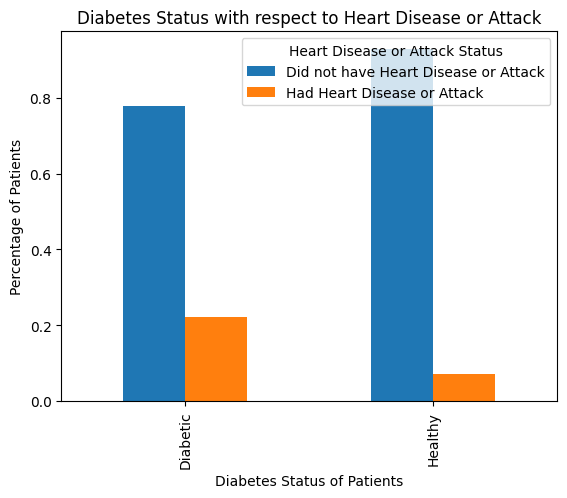

In [ ]:

# Filter out prediabetes (value 1 in Diabetes_012)
filtered_data = data[data['Outcome'] != 1]

# Map diabetes status and heart disease status to human-readable categories
filtered_data['Diabetes Status'] = filtered_data['Outcome'].map({0: 'Healthy', 2: 'Diabetic'})
filtered_data['Heart Disease or Attack Status'] = filtered_data['HeartDiseaseorAttack'].map({0: 'Did not have Heart Disease or Attack', 1: 'Had Heart Disease or Attack'})

# Calculate the percentage of each category
percentage_data = filtered_data.groupby(['Diabetes Status', 'Heart Disease or Attack Status']).size().reset_index(name='Count')
total_counts = filtered_data['Diabetes Status'].value_counts().to_dict()
percentage_data['Percentage'] = percentage_data.apply(lambda row: row['Count'] / total_counts[row['Diabetes Status']], axis=1)

# Pivot the data for easier plotting
pivot_data = percentage_data.pivot(index='Diabetes Status', columns='Heart Disease or Attack Status', values='Percentage')

# Plot the data
pivot_data.plot(kind='bar')
plt.title('Diabetes Status with respect to Heart Disease or Attack')
plt.xlabel('Diabetes Status of Patients')
plt.ylabel('Percentage of Patients')
plt.legend(title='Heart Disease or Attack Status')
plt.show()


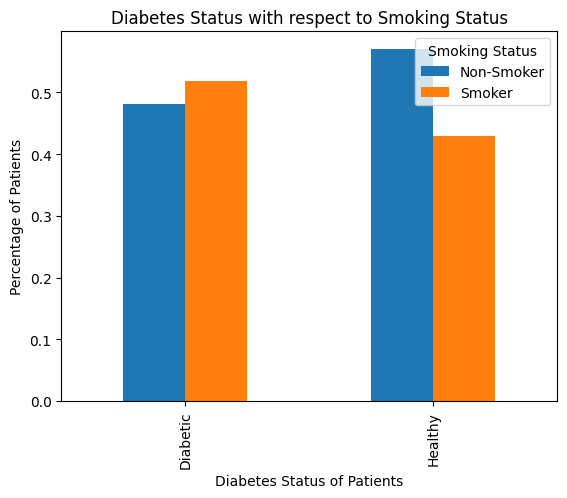

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out prediabetes (value 1 in Diabetes_012)
filtered_data = data[data['Outcome'] != 1]

# Map diabetes status and smoking status to human-readable categories
filtered_data['Diabetes Status'] = filtered_data['Outcome'].map({0: 'Healthy', 2: 'Diabetic'})
filtered_data['Smoking Status'] = filtered_data['Smoker'].map({0: 'Non-Smoker', 1: 'Smoker'})

# Calculate the percentage of each category
percentage_data = filtered_data.groupby(['Diabetes Status', 'Smoking Status']).size().reset_index(name='Count')
total_counts = filtered_data['Diabetes Status'].value_counts().to_dict()
percentage_data['Percentage'] = percentage_data.apply(lambda row: row['Count'] / total_counts[row['Diabetes Status']], axis=1)

# Pivot the data for easier plotting
pivot_data = percentage_data.pivot(index='Diabetes Status', columns='Smoking Status', values='Percentage')

# Plot the data
pivot_data.plot(kind='bar')
plt.title('Diabetes Status with respect to Smoking Status')
plt.xlabel('Diabetes Status of Patients')
plt.ylabel('Percentage of Patients')
plt.legend(title='Smoking Status')
plt.show()


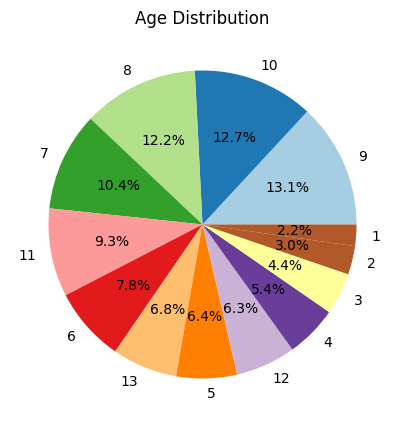

In [ ]:
# Assuming 'Age' column has categorical data that can be used for pie chart
age_counts = data['Age'].value_counts(normalize=True) * 100

# Create labels for the pie chart
# Modify labels according to the categories in the 'Age' column
labels = age_counts.index
plt.figure(figsize=(5,5))
# Create the pie chart
plt.pie(age_counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(age_counts))))
plt.title("Age Distribution")
plt.show()

In [ ]:


diabetes_counts = data['Outcome'].value_counts().reset_index()
diabetes_counts.columns = ['Outcome', 'Count']

output_path = 'diabetes_counts.csv'
diabetes_counts.to_csv(output_path, index=False)

# Display the counts
diabetes_counts


,Outcome,Count
0,0,213703
1,2,35346
2,1,4631


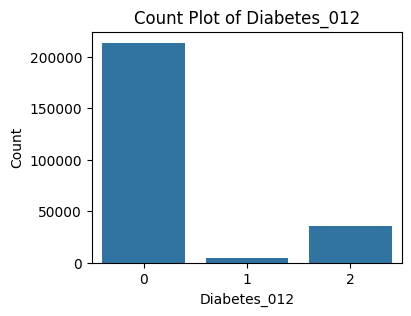

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
file_path = 'orginal diabetes.csv'
data = pd.read_csv(file_path)

# Plot the count plot
plt.figure(figsize=(4,3))
sns.countplot(x='Diabetes_012', data=data)
plt.title('Count Plot of Diabetes_012')
plt.xlabel('Diabetes_012')
plt.ylabel('Count')
plt.show()


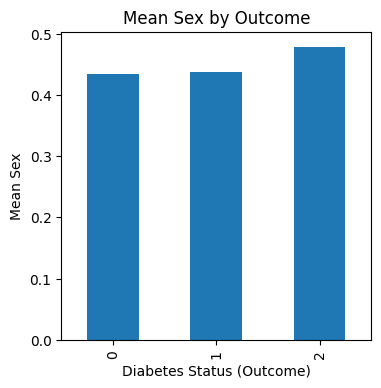

In [ ]:
import matplotlib.pyplot as plt

mean_sex_by_outcome = data.groupby('Outcome')['Sex'].mean()
mean_sex_by_outcome.plot(kind='bar', figsize=(4, 4))  # Adjust figsize as needed
plt.xlabel('Diabetes Status (Outcome)')
plt.ylabel('Mean Sex')
plt.title('Mean Sex by Outcome')
plt.show()


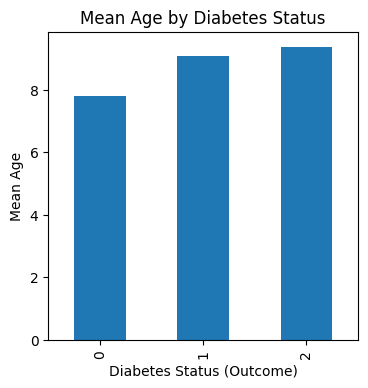

In [ ]:
# Assuming 'Sex' was meant to represent 'Age' based on the context of mean age by outcome
mean_age_by_outcome = data.groupby('Outcome')['Age'].mean()
mean_age_by_outcome.plot(kind='bar', figsize=(4,4))  # Adjust figsize as needed
plt.xlabel('Diabetes Status (Outcome)')
plt.ylabel('Mean Age')
plt.title('Mean Age by Diabetes Status')
plt.show()

In [ ]:
print("MAX AGE: "+str(data['Age'].max()))
print("MIN AGE: "+str(data['Age'].min()))

MAX AGE: 13
MIN AGE: 1


In [ ]:
print("MAX AGE: "+str(data['Education'].max()))
print("MIN AGE: "+str(data['Education'].min()))

MAX AGE: 6
MIN AGE: 1


In [ ]:
print("MAX AGE: "+str(data['BMI'].max()))
print("MIN AGE: "+str(data['BMI'].min()))

MAX AGE: 98
MIN AGE: 12


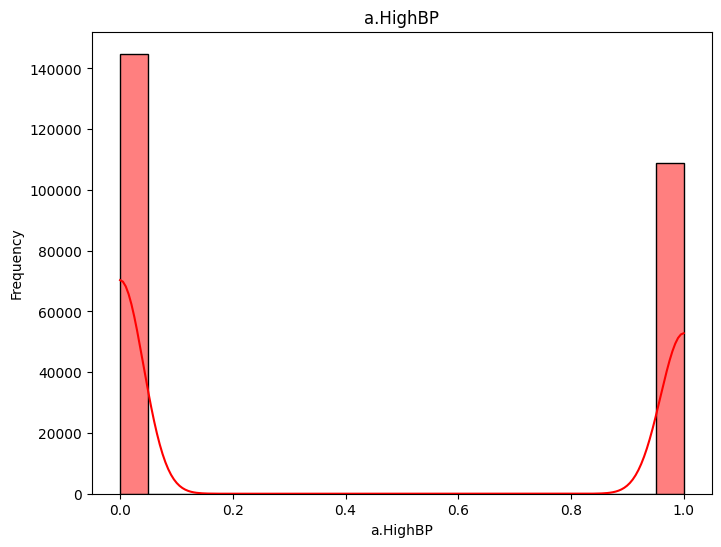

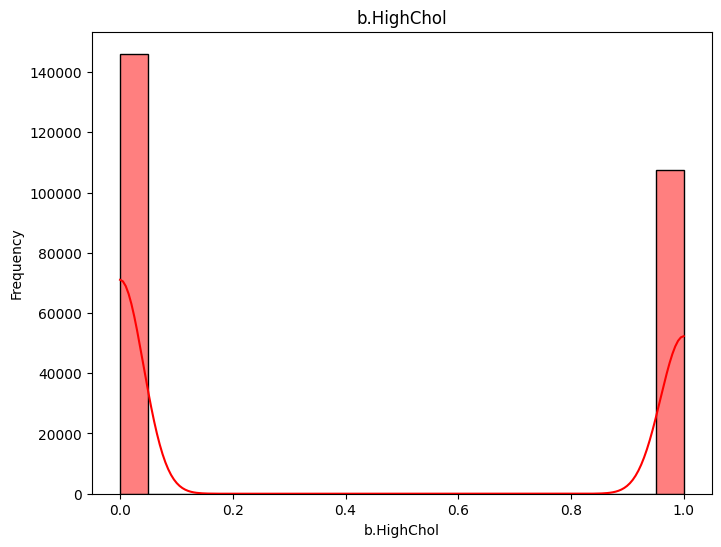

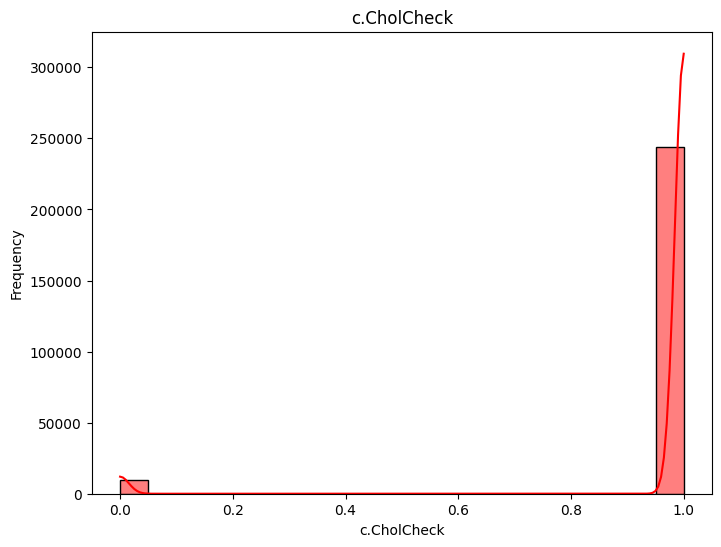

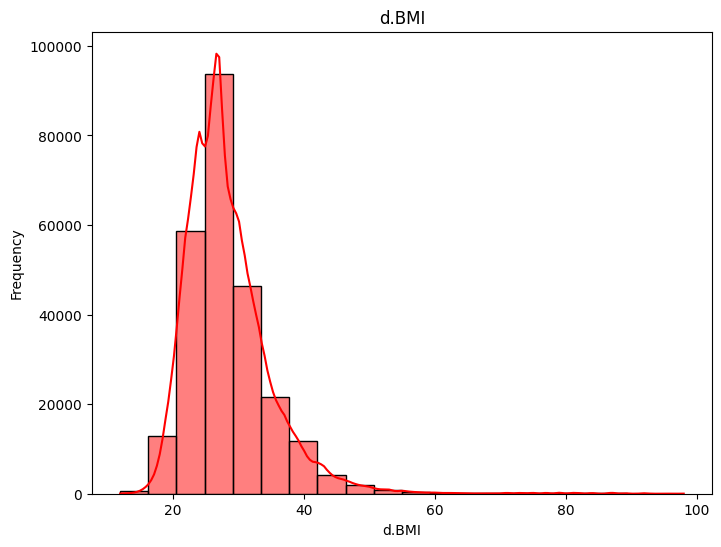

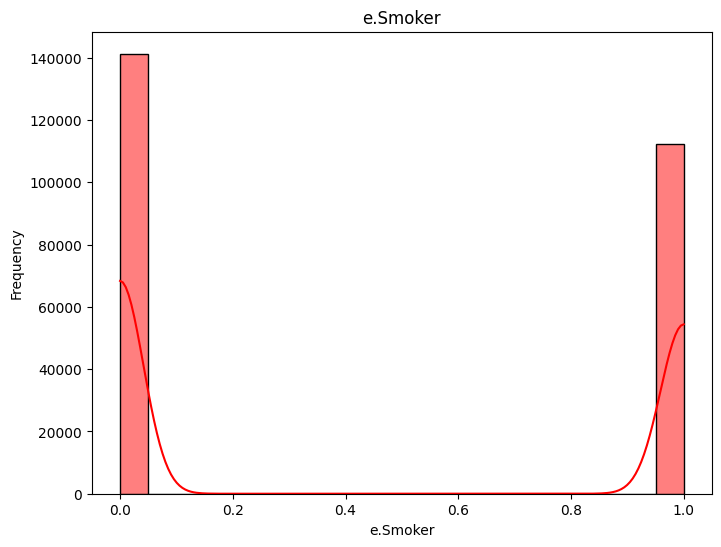

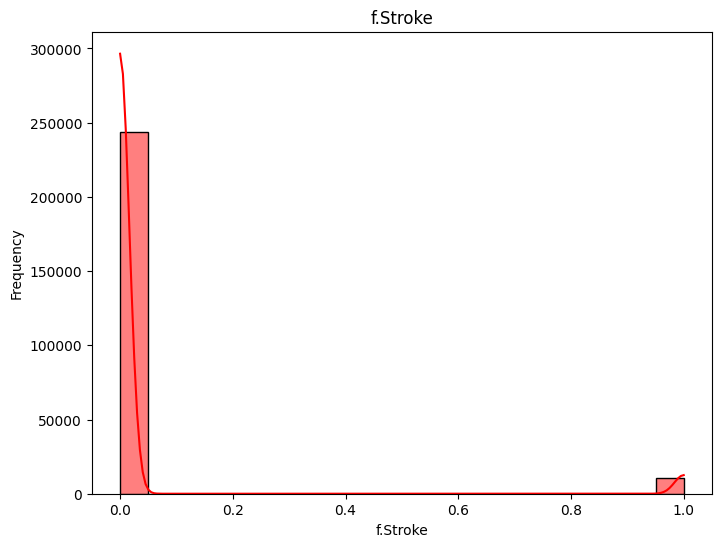

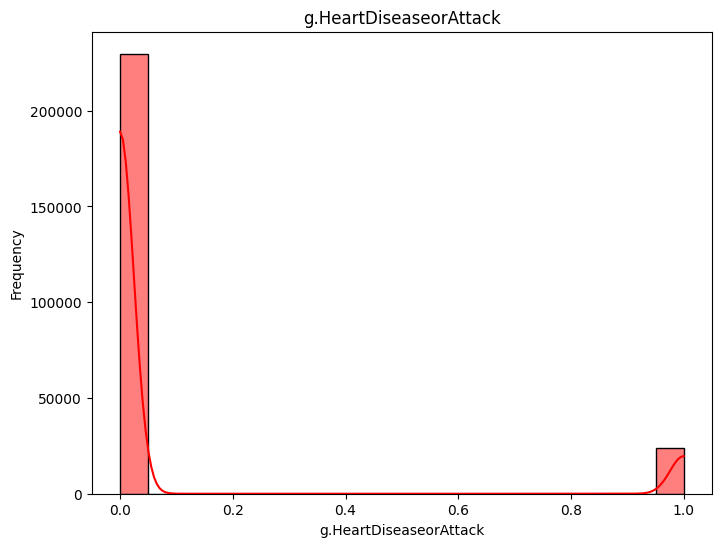

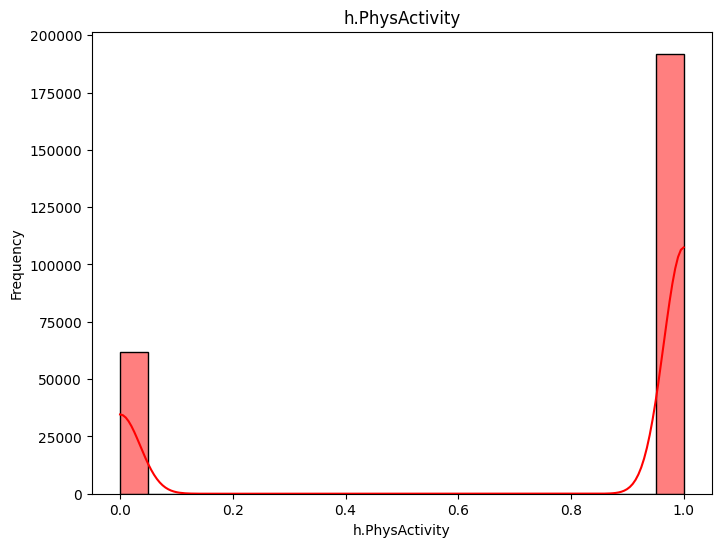

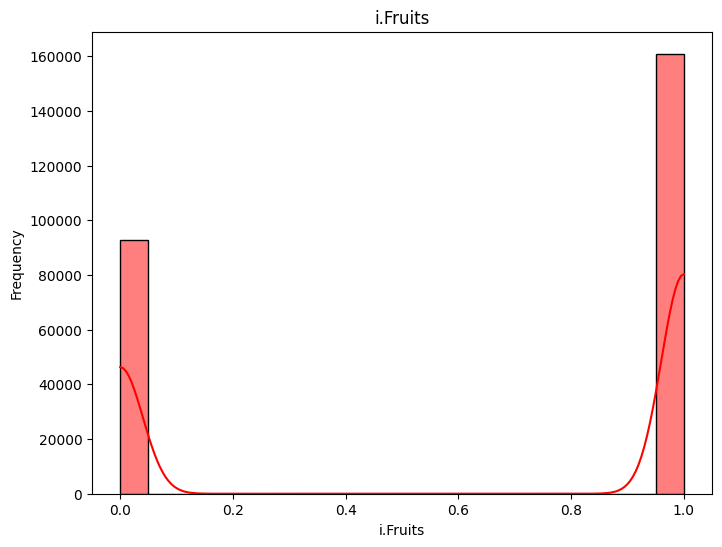

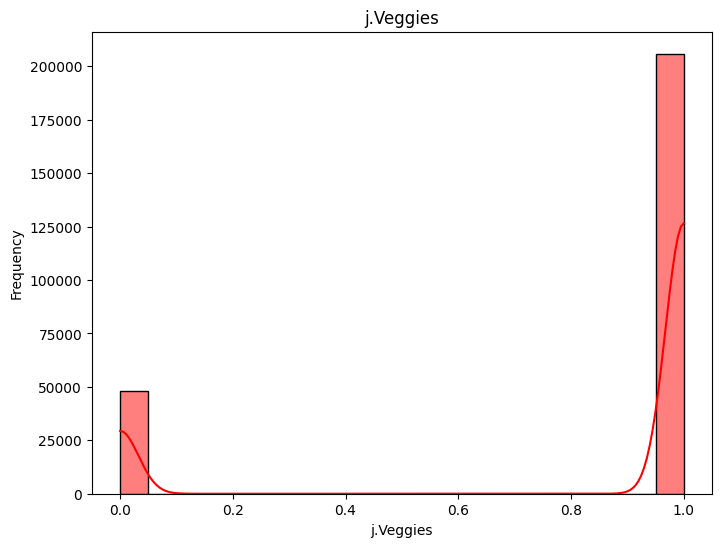

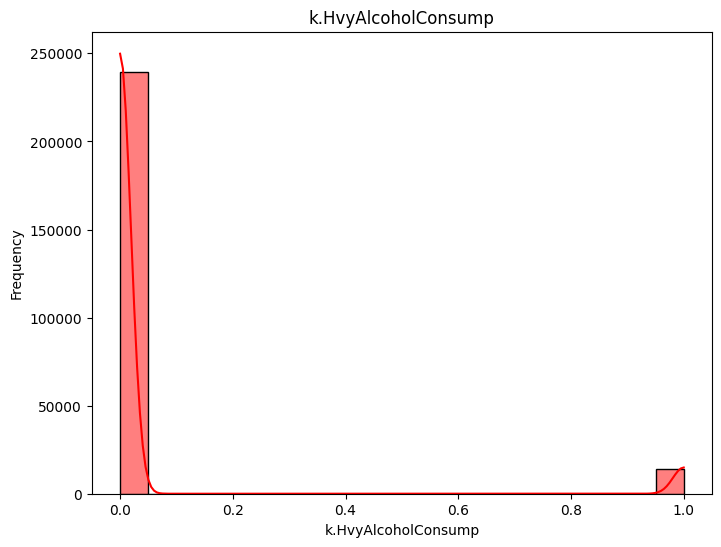

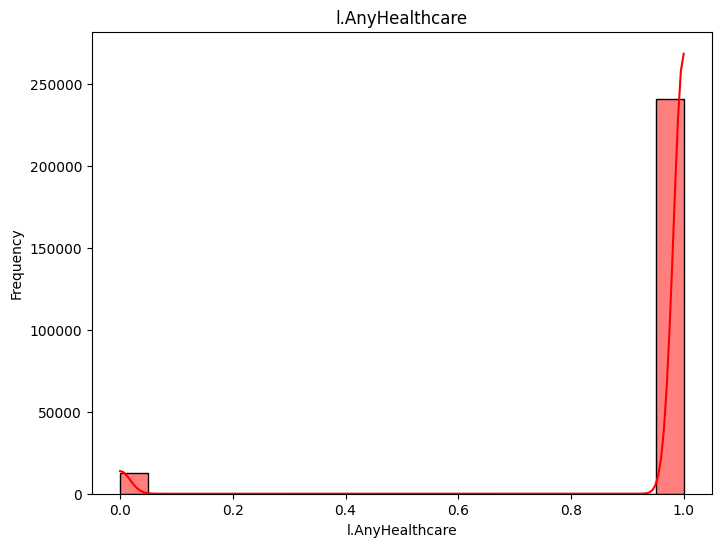

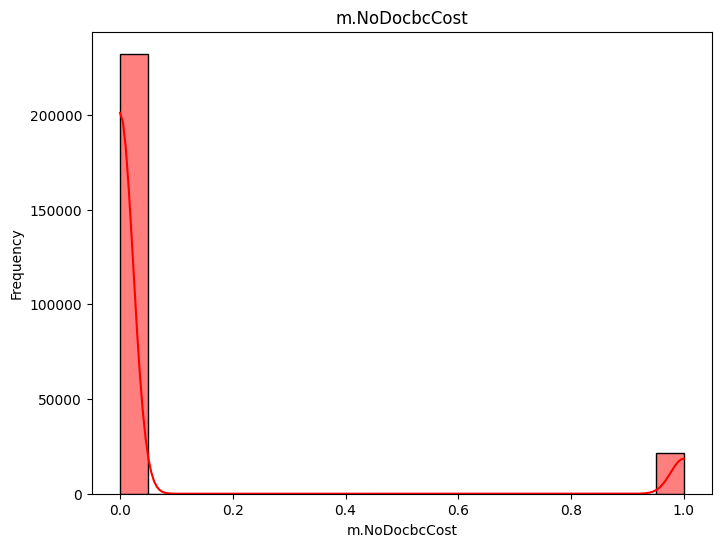

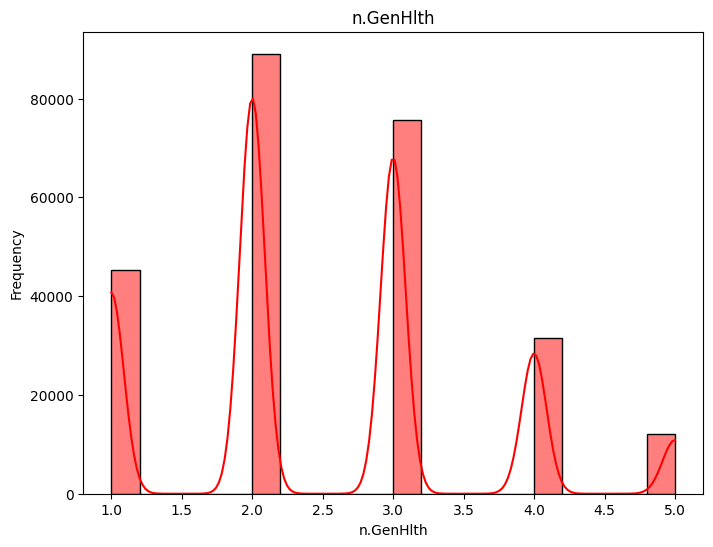

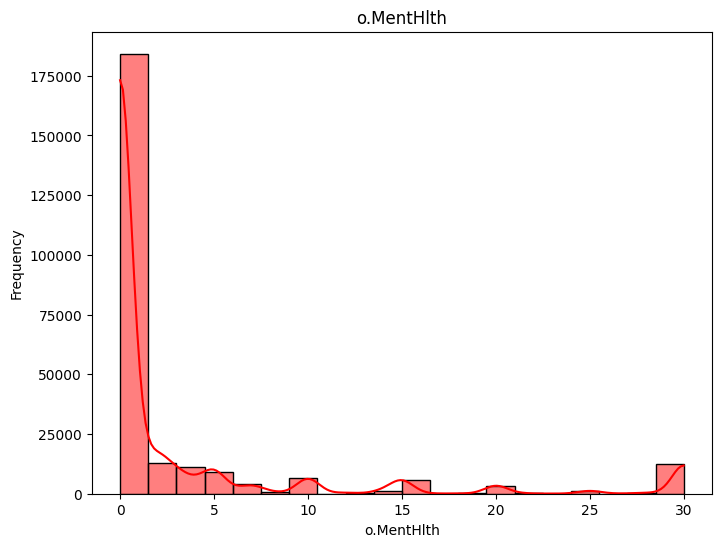

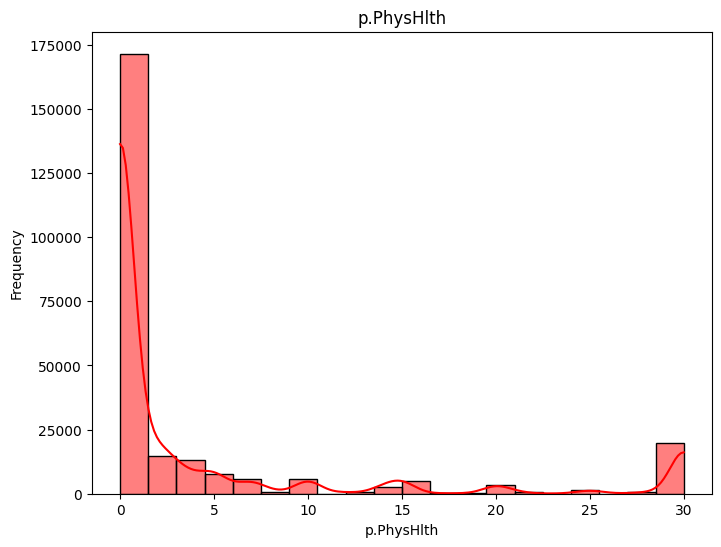

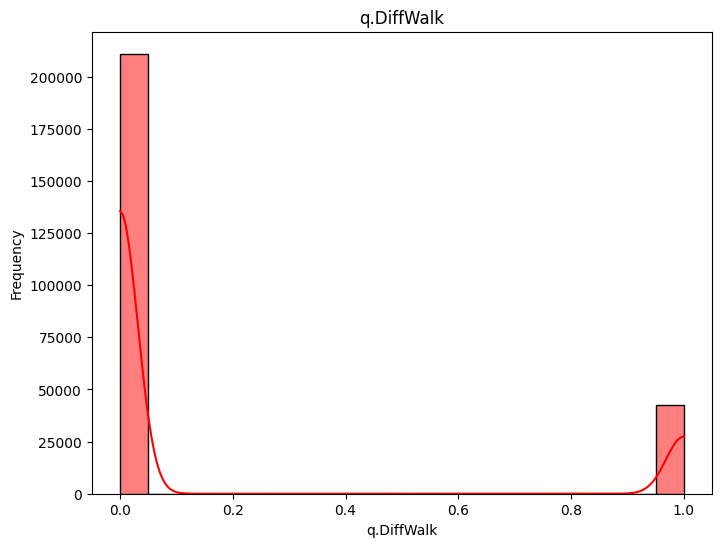

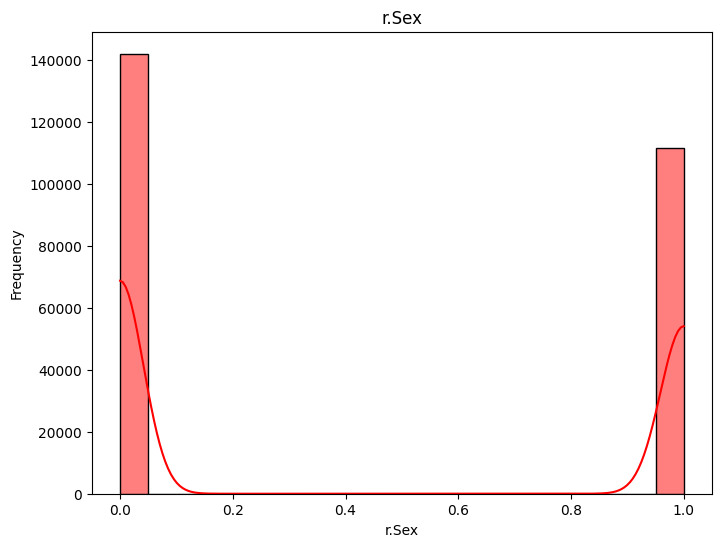

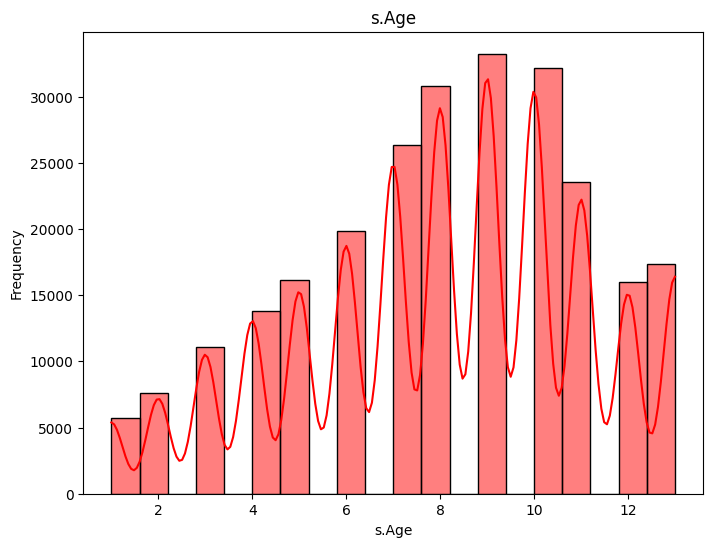

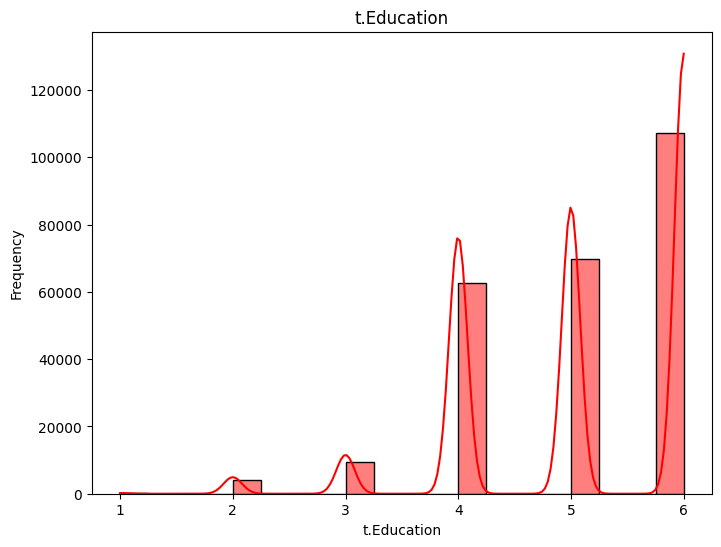

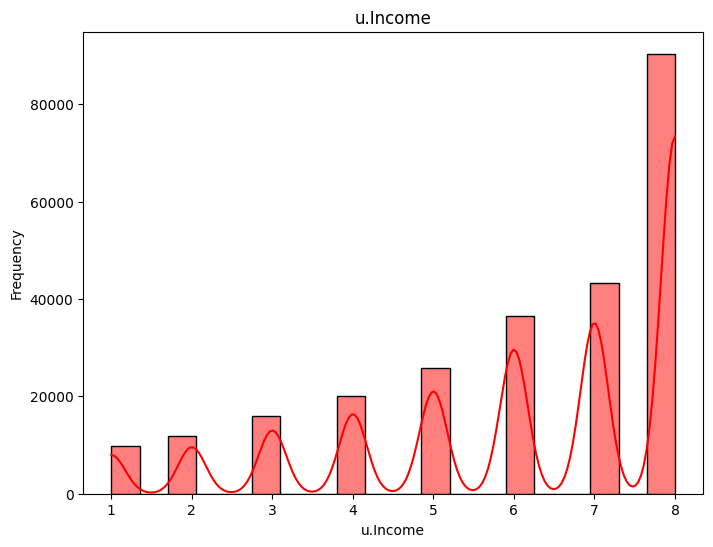

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = r'orginal diabetes.csv'
data = pd.read_csv(file_path)

# List of columns to plot
columns = [
    'a.HighBP', 'b.HighChol', 'c.CholCheck', 'd.BMI', 'e.Smoker', 'f.Stroke',
    'g.HeartDiseaseorAttack', 'h.PhysActivity', 'i.Fruits', 'j.Veggies',
    'k.HvyAlcoholConsump', 'l.AnyHealthcare', 'm.NoDocbcCost', 'n.GenHlth',
    'o.MentHlth', 'p.PhysHlth', 'q.DiffWalk', 'r.Sex', 's.Age', 't.Education', 'u.Income'
]

# Plot each column in a separate figure
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=20, color='red', kde=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
print(data.groupby("Outcome").agg({'HighBP' : 'mean'}))
print(data.groupby("Outcome").agg({'HighBP' : 'max'}))

           HighBP
Outcome          
0        0.371132
1        0.629022
2        0.752674
         HighBP
Outcome        
0             1
1             1
2             1


In [ ]:
print(data.groupby("Outcome").agg({'HighChol' : 'mean'}))
print(data.groupby("Outcome").agg({'HighChol' : 'max'}))

         HighChol
Outcome          
0        0.379171
1        0.620816
2        0.670118
         HighChol
Outcome          
0               1
1               1
2               1


In [ ]:
print(data.groupby("Outcome").agg({'CholCheck': 'mean'}))
print(data.groupby("Outcome").agg({ 'CholCheck' : 'max'}))

         CholCheck
Outcome           
0         0.957104
1         0.986612
2         0.993182
         CholCheck
Outcome           
0                1
1                1
2                1


In [ ]:
data.corr()

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Outcome,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


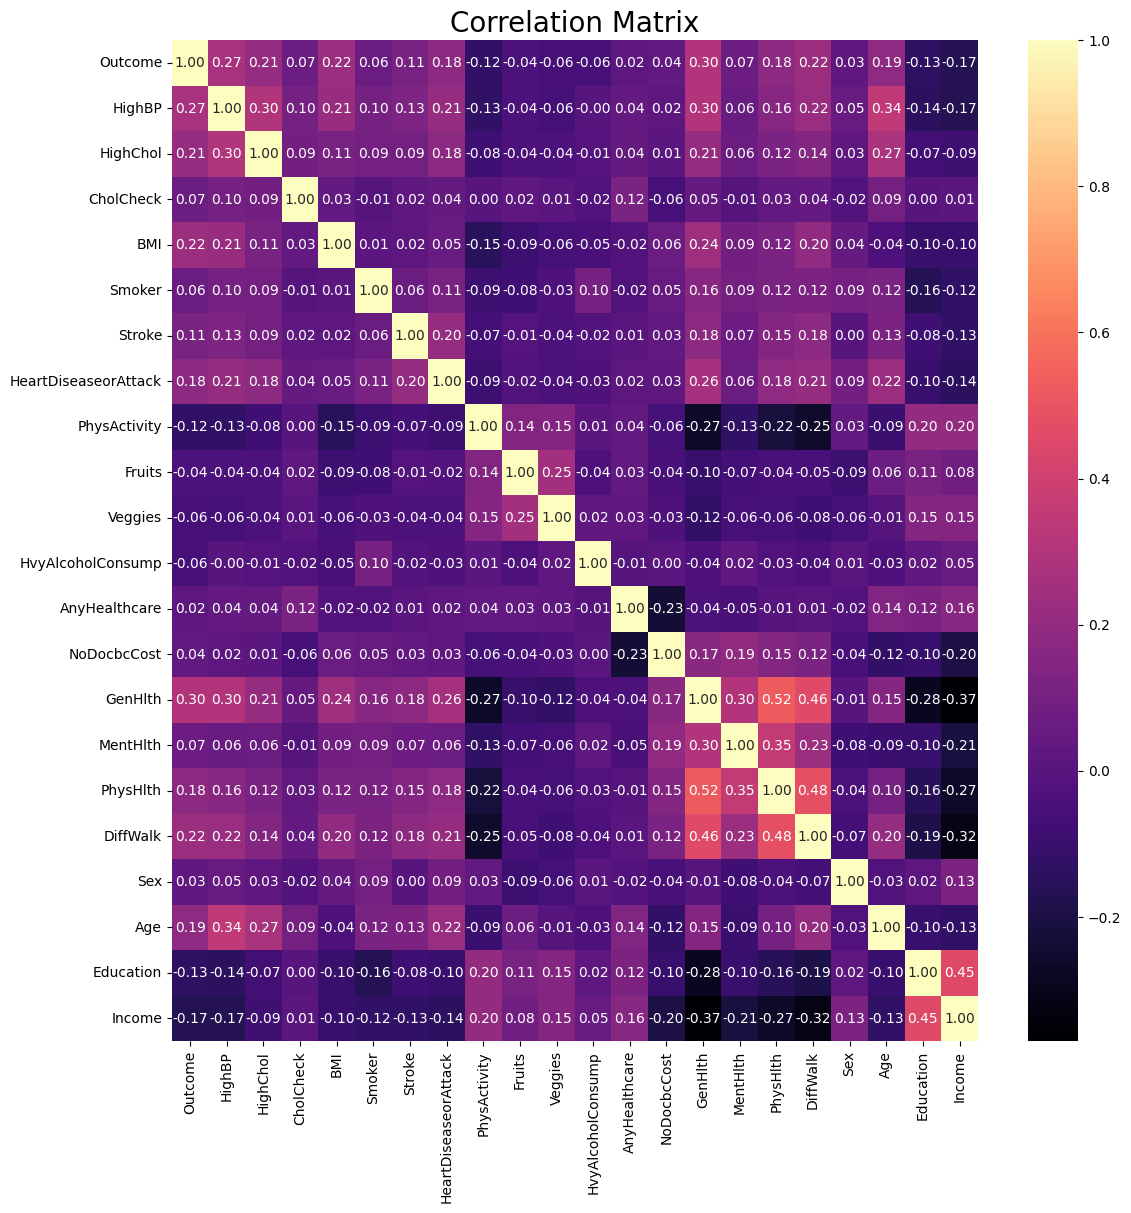

In [ ]:
f,ax = plt.subplots(figsize=[13,13])
sns.heatmap(data.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
#median
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
columns = data.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = median_target(i)[i][0]
    data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
data.head().T

,Outcome,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
data.isnull().sum()

Outcome                 0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# Replace 0 with NaN
columns_to_process = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
                      'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                      'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
                      'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
                      'Income']

data[columns_to_process] = data[columns_to_process].replace(0, np.NaN)

# Create an imputer object
imputer = SimpleImputer(strategy='mean')  # You can change 'mean' to 'median', 'most_frequent', or 'constant'

# Fit the imputer to the data and transform it
data[columns_to_process] = imputer.fit_transform(data[columns_to_process])

# Verify that there are no NaN values
print(data[columns_to_process].isnull().sum())

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
numeric_features = data.select_dtypes(include=[np.number]).columns
# Outlier detection using IQR
for feature in numeric_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if (data[feature] > upper).any():
        print(feature, "yes")
    else:
        print(feature, "no")

HighBP no
HighChol no
CholCheck no
BMI yes
Smoker no
Stroke no
HeartDiseaseorAttack no
PhysActivity no
Fruits no
Veggies no
HvyAlcoholConsump no
AnyHealthcare no
NoDocbcCost no
GenHlth yes
MentHlth yes
PhysHlth yes
DiffWalk no
Sex no
Age no
Education no
Income no


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
import warnings

warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")

# Load the provided CSV file
file_path = 'orginal diabetes.csv'
data = pd.read_csv(r'orginal diabetes.csv')

# Handle missing values by imputing with the mean value
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=10)
outliers = lof.fit_predict(df_imputed)

# Identify and print outliers
df_imputed['Outlier'] = outliers
print(df_imputed['Outlier'].value_counts())
print(df_imputed[df_imputed['Outlier'] == -1])


Outlier
 1    242952
-1     10728
Name: count, dtype: int64
        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
155              0.0     0.0       0.0        1.0  23.0     0.0     0.0   
199              0.0     0.0       0.0        1.0  21.0     0.0     0.0   
300              0.0     0.0       0.0        1.0  25.0     0.0     0.0   
424              0.0     0.0       0.0        1.0  20.0     0.0     0.0   
439              0.0     1.0       0.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253223           0.0     1.0       0.0        1.0  24.0     0.0     0.0   
253340           0.0     0.0       0.0        1.0  23.0     0.0     0.0   
253357           0.0     0.0       1.0        1.0  23.0     0.0     0.0   
253375           0.0     0.0       0.0        1.0  21.0     0.0     0.0   
253656           0.0     0.0       0.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActiv

In [ ]:
df_score = lof.negative_outlier_factor_
np.sort(df_score)[0:20]

array([-1.60000000e+10, -1.55884573e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.39776832e+10, -1.27279221e+10, -1.27279221e+10,
       -1.27279221e+10, -1.27279221e+10, -1.21243557e+10, -1.16793835e+10,
       -1.15679783e+10, -1.13137085e+10, -1.13137085e+10, -1.13137085e+10,
       -1.13137085e+10, -1.13137085e+10, -1.13137085e+10, -1.13137085e+10])

In [ ]:
thresold = np.sort(df_score)[8]

In [ ]:
thresold 

-12727922062.39928

In [ ]:
outlier = df_score>thresold

In [ ]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
#feature enginerring
NewBMI = pd.Series(['Underweight','Normal','Overweight','Obesity 1','Obesity 2','Obesity 3'],dtype = 'category')

In [ ]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [ ]:
data['NewBMI'] = NewBMI
data.loc[data['BMI']<18.5,'NewBMI'] = NewBMI[0]
data.loc[(data["BMI"]>18.5) & data['BMI']<=24.9,"NewBMI"] = NewBMI[1]
data.loc[(data["BMI"]>24.9) & data['BMI']<=29.9,"NewBMI"] = NewBMI[2]
data.loc[(data["BMI"]>29.9) & data['BMI']<=34.9,"NewBMI"] = NewBMI[3]
data.loc[(data["BMI"]>34.5) & data['BMI']<=39.9,"NewBMI"] = NewBMI[4]
data.loc[data['BMI']>39.9,'NewBMI']= NewBMI[5]

In [ ]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,NewBMI
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,Obesity 3
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,Obesity 2
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,Obesity 2
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,Obesity 2
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,Obesity 2


In [ ]:
#if Insulin  is greater than 16
def set_insuline(row):
    if row["Age"]>=16 and row["Age"]<166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
data = data.assign(NewAgescore=data.apply(set_insuline, axis=1))

In [ ]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,NewBMI,NewAgescore
0,0,1,1,1,40,1,0,0,0,0,...,5,18,15,1,0,9,4,3,Obesity 3,Abnormal
1,0,0,0,0,25,1,0,0,1,0,...,3,0,0,0,0,7,6,1,Obesity 2,Abnormal
2,0,1,1,1,28,0,0,0,0,1,...,5,30,30,1,0,9,4,8,Obesity 2,Abnormal
3,0,1,0,1,27,0,0,0,1,1,...,2,0,0,0,0,11,3,6,Obesity 2,Abnormal
4,0,1,1,1,24,0,0,0,1,1,...,2,3,0,0,0,11,5,4,Obesity 2,Abnormal


In [ ]:
data = pd.get_dummies(data,columns=["NewBMI","NewAgescore"], drop_first=True)

In [ ]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,DiffWalk,Sex,Age,Education,Income,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight
0,0,1,1,1,40,1,0,0,0,0,...,1,0,9,4,3,False,False,True,False,False
1,0,0,0,0,25,1,0,0,1,0,...,0,0,7,6,1,False,True,False,False,False
2,0,1,1,1,28,0,0,0,0,1,...,1,0,9,4,8,False,True,False,False,False
3,0,1,0,1,27,0,0,0,1,1,...,0,0,11,3,6,False,True,False,False,False
4,0,1,1,1,24,0,0,0,1,1,...,0,0,11,5,4,False,True,False,False,False


In [ ]:
categorical_df = data[['NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight']]

In [ ]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight
0,False,False,True,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [ ]:
y=data['Diabetes_012']
X=data.drop(['Diabetes_012','NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight'],axis=1)

In [ ]:
cols = X.columns
index = X.index

In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,0.0,1.857143,1.0,0.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,3.0,9.0,5.0,1.0,0.0,0.25,-0.5,-1.333333
1,0.0,0.0,-1.0,-0.285714,1.0,0.0,0.0,0.0,-1.0,-1.0,...,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.25,0.5,-2.000000
2,1.0,1.0,0.0,0.142857,0.0,0.0,0.0,-1.0,0.0,-1.0,...,0.0,1.0,3.0,15.0,10.0,1.0,0.0,0.25,-0.5,0.333333
3,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,-1.0,-0.333333
4,1.0,1.0,0.0,-0.428571,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.75,0.0,-1.000000


In [ ]:
pd.concat([X,categorical_df],axis=1)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,DiffWalk,Sex,Age,Education,Income,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight
0,1.0,1.0,0.0,1.857143,1.0,0.0,0.0,-1.0,-1.0,0.0,...,1.0,0.0,0.25,-0.5,-1.333333,False,False,True,False,False
1,0.0,0.0,-1.0,-0.285714,1.0,0.0,0.0,0.0,-1.0,-1.0,...,0.0,0.0,-0.25,0.5,-2.000000,False,True,False,False,False
2,1.0,1.0,0.0,0.142857,0.0,0.0,0.0,-1.0,0.0,-1.0,...,1.0,0.0,0.25,-0.5,0.333333,False,True,False,False,False
3,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.75,-1.0,-0.333333,False,True,False,False,False
4,1.0,1.0,0.0,-0.428571,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.75,0.0,-1.000000,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,0.0,2.571429,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,1.0,-0.75,0.5,0.000000,False,False,True,False,False
253676,1.0,1.0,0.0,-1.285714,0.0,0.0,0.0,-1.0,-1.0,-1.0,...,1.0,0.0,0.75,-1.5,-1.000000,False,True,False,False,False
253677,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,-1.50,0.0,-1.666667,False,True,False,False,False
253678,1.0,0.0,0.0,-0.571429,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,1.0,-0.25,0.0,-2.000000,False,True,False,False,False


In [ ]:
############################################### Gradient Boosting Machines (GBM) ##############################################################3 

# Sample a subset of the data for quicker training (e.g., 10% of the data)
data_sampled = data.sample(frac=0.1, random_state=42)

# Separate features and target variable
X = data_sampled.drop(columns=['Outcome'])
y = data_sampled['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the XGBoost model with fewer boosting rounds
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy1}')
print('Classification Report:')
print(report)


Accuracy: 0.8533701221915648
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      4296
           1       0.00      0.00      0.00        76
           2       0.58      0.16      0.24       702

    accuracy                           0.85      5074
   macro avg       0.48      0.38      0.39      5074
weighted avg       0.81      0.85      0.81      5074



In [ ]:
###################################################Random Forest alogithm #####################################################################
X = data.drop(columns=['Outcome'])
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy2}')
print('Classification Report:')
print(report)


Accuracy: 0.8410990223904131
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     42795
           1       0.00      0.00      0.00       944
           2       0.47      0.20      0.28      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.39      0.40     50736
weighted avg       0.79      0.84      0.81     50736



In [ ]:
############################### Neural Network Training Code ##################################
X = data.drop(columns=['Outcome'])
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(random_state=42, max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy3}')
print('Classification Report:')
print(report)


Accuracy: 0.8482537054556922
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42795
           1       0.00      0.00      0.00       944
           2       0.54      0.18      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



In [ ]:
##################################    KNN      ########################3

data = pd.read_csv(r'orginal diabetes.csv')
X = data.drop(columns=['Diabetes_012'])  
y = data['Diabetes_012']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy4 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy4:.4f}')
print('Classification Report:')
print(report)


Accuracy: 0.8303
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     42795
           1       0.03      0.00      0.00       944
           2       0.40      0.21      0.27      6997

    accuracy                           0.83     50736
   macro avg       0.43      0.39      0.39     50736
weighted avg       0.78      0.83      0.80     50736



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
data = pd.read_csv(r'orginal diabetes.csv')

X = data.drop(columns=['Diabetes_012'])  
y = data['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Discriminant Analysis (LDA) classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred_lda = lda.predict(X_test_scaled)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
report_lda = classification_report(y_test, y_pred_lda)

print(f'LDA Accuracy: {accuracy_lda:.4f}')
print('LDA Classification Report:')
print(report_lda)


LDA Accuracy: 0.8447
LDA Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     42795
           1       0.00      0.00      0.00       944
           2       0.49      0.23      0.31      6997

    accuracy                           0.84     50736
   macro avg       0.45      0.40      0.41     50736
weighted avg       0.80      0.84      0.81     50736



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv(r'orginal diabetes.csv')
X = data.drop(columns=['Diabetes_012'])  
y = data['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Quadratic Discriminant Analysis (QDA) classifier
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

# Make predictions on the test set using QDA
y_pred_qda = qda.predict(X_test_scaled)

accuracy_qda = accuracy_score(y_test, y_pred_qda)
report_qda = classification_report(y_test, y_pred_qda)

print(f'QDA Accuracy: {accuracy_qda:.4f}')
print('QDA Classification Report:')
print(report_qda)

QDA Accuracy: 0.7512
QDA Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     42795
           1       0.03      0.01      0.02       944
           2       0.31      0.55      0.40      6997

    accuracy                           0.75     50736
   macro avg       0.42      0.45      0.42     50736
weighted avg       0.81      0.75      0.77     50736



In [ ]:
#################################################### Logistic Regression model #############################################
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


data = pd.read_csv('orginal diabetes.csv') 

data.rename(columns={'Diabetes_012': 'Outcome'}, inplace=True)

X = data.drop(columns=['Outcome'])
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

lr = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_lr = grid_search.best_estimator_

y_pred = best_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Best Parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Accuracy: 0.8483916745506149
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42795
           1       0.00      0.00      0.00       944
           2       0.54      0.18      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



In [ ]:
################################################################### DT ###########################################################333
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
data = pd.read_csv(r'orginal diabetes.csv') 
data.rename(columns={'Diabetes_012': 'Outcome'}, inplace=True)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

accuracy5= accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy5}')
print('Classification Report:')
print(report)


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.8475835698517817
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42795
           1       0.00      0.00      0.00       944
           2       0.53      0.16      0.25      6997

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



In [ ]:
########################################################################### Naive Bayes #################################################################
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

file_path = r'orginal diabetes.csv' 
data = pd.read_csv(file_path)


X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy11 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy11}")
report = classification_report(y_test, y_pred, target_names=['0', '1', '2'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

print(report_df)



Accuracy: 0.7537251655629139
              precision    recall  f1-score       support
0              0.907354  0.801449  0.851120  42795.000000
1              0.038182  0.022246  0.028112    944.000000
2              0.316648  0.560526  0.404685   6997.000000
accuracy       0.753725  0.753725  0.753725      0.753725
macro avg      0.420728  0.461407  0.427972  50736.000000
weighted avg   0.809718  0.753725  0.774239  50736.000000


In [ ]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Gradient Boosting Machines (GBM)', 'Random Forest', 'Neural Networks', 'k-Nearest Neighbors (k-NN)', 'Linear Discriminant Analysis (LDA)', 'Quadratic Discriminant Analysis (QDA)', 'DecsionForest','LogisticRegression','Navie Bayes'],
    'Score': [100*round(accuracy1,4), 100*round(accuracy2,4), 100*round(accuracy3,4), 100*round(accuracy4,4), 100*round(accuracy_lda,4), 100*round(accuracy_qda,4), 100*round(accuracy,4),100*round(accuracy5,4),100*(accuracy11)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Gradient Boosting Machines (GBM),85.340000
6,DecsionForest,84.840000
2,Neural Networks,84.830000
7,LogisticRegression,84.760000
4,Linear Discriminant Analysis (LDA),84.470000
1,Random Forest,84.110000
3,k-Nearest Neighbors (k-NN),83.030000
8,Navie Bayes,75.372517
5,Quadratic Discriminant Analysis (QDA),75.120000


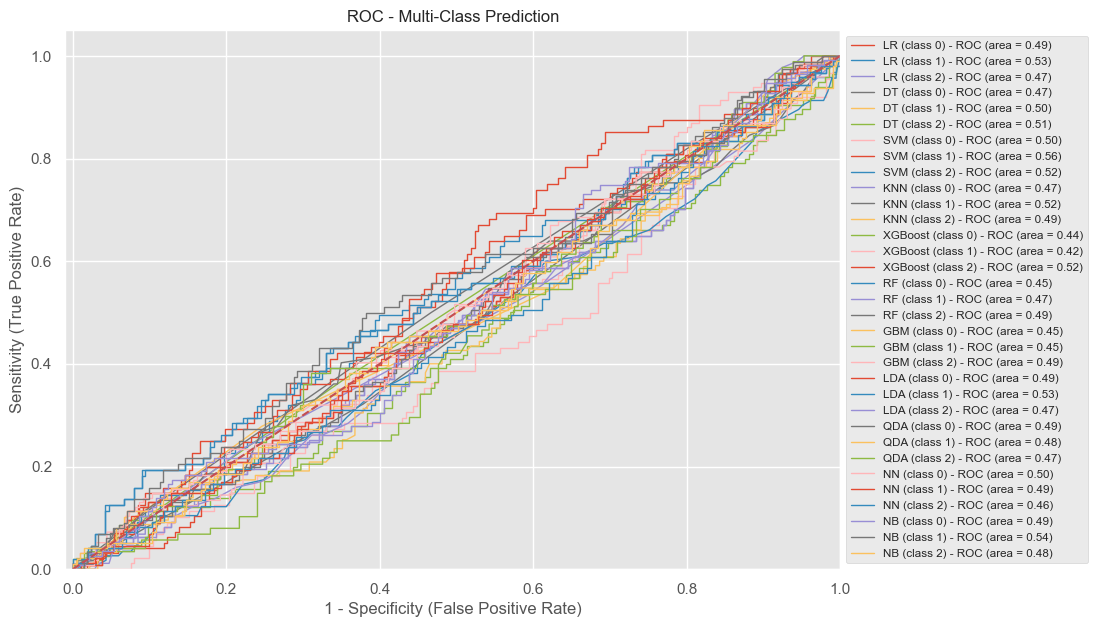

                                    Model  Score
9                    Neural Networks (NN)  35.67
3               k-Nearest Neighbors (KNN)  34.33
8   Quadratic Discriminant Analysis (QDA)  34.00
1                      Decision Tree (DT)  33.67
2            Support Vector Machine (SVM)  32.67
5                      Random Forest (RF)  32.33
10                       Naive Bayes (NB)  32.33
0                Logistic Regression (LR)  31.67
7      Linear Discriminant Analysis (LDA)  31.33
4                                 XGBoost  28.33
6        Gradient Boosting Machines (GBM)  27.67


<Figure size 800x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
data = pd.DataFrame({
    'feature1': np.random.rand(1000),
    'feature2': np.random.rand(1000),
    'feature3': np.random.rand(1000),
    'target': np.random.choice([0, 1, 2], 1000)  
})

X = data[['feature1', 'feature2', 'feature3']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
DT = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
rand_clf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
nn = MLPClassifier(max_iter=1000)
nb = GaussianNB()  
models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': DT},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'GBM', 'model': gbc},
    {'label': 'LDA', 'model': lda},
    {'label': 'QDA', 'model': qda},
    {'label': 'NN', 'model': nn},
    {'label': 'NB', 'model': nb}  
]
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_train_bin.shape[1]

plt.figure(figsize=(10, 7))

for m in models:
    model = m['model']
    classifier = OneVsRestClassifier(model)
    classifier.fit(X_train, y_train_bin)
    y_score = classifier.predict_proba(X_test)
    
    for i in range(n_classes):
        fpr, tpr, _ = metrics.roc_curve(y_test_bin[:, i], y_score[:, i])
        auc = metrics.roc_auc_score(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, label='%s (class %d) - ROC (area = %0.2f)' % (m['label'], i, auc), linewidth=1)

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Multi-Class Prediction', fontsize=12)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small')
plt.savefig("roc_multiclass.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()
accuracies = []

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(100 * round(accuracy, 4))

model_labels = [
    'Logistic Regression (LR)', 'Decision Tree (DT)', 'Support Vector Machine (SVM)',
    'k-Nearest Neighbors (KNN)', 'XGBoost', 'Random Forest (RF)',
    'Gradient Boosting Machines (GBM)', 'Linear Discriminant Analysis (LDA)', 
    'Quadratic Discriminant Analysis (QDA)', 'Neural Networks (NN)', 'Naive Bayes (NB)'
]

models_df = pd.DataFrame({
    'Model': model_labels,
    'Score': accuracies
})

models_df = models_df.sort_values(by='Score', ascending=False)
plt.figure(figsize=(8, 8))
print(models_df)


[84.83, 84.75, 83.03, 84.1, 85.33, 84.47, 75.12, 84.82, 83.21]
[78.17, 57.120000000000005, 65.71000000000001, 73.92, 79.10000000000001, 77.88000000000001, 73.61, 78.27, 73.76]


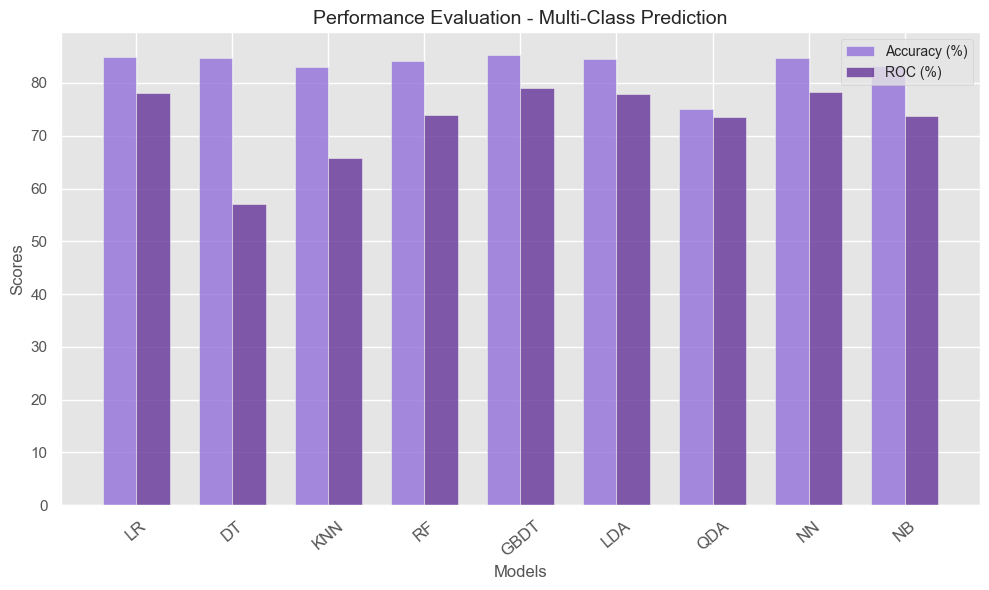

                                   Model  Score
4      Gradient Boosting Machines (GBDT)  85.33
0               Logistic Regression (LR)  84.83
7                   Neural Networks (NN)  84.82
1                     Decision Tree (DT)  84.75
5     Linear Discriminant Analysis (LDA)  84.47
3                     Random Forest (RF)  84.10
8                       Naive Bayes (NB)  83.21
2              k-Nearest Neighbors (KNN)  83.03
6  Quadratic Discriminant Analysis (QDA)  75.12


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data = pd.read_csv(r'orginal diabetes.csv')  

data.rename(columns={'Diabetes_012': 'Outcome'}, inplace=True)
data.fillna(data.mean(), inplace=True)
X = data.drop(columns=['Outcome'])
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
DT = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rand_clf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
nn = MLPClassifier(max_iter=1000)
nb = GaussianNB()  

models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': DT},
    {'label': 'KNN', 'model': knn},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'GBDT', 'model': gbc},
    {'label': 'LDA', 'model': lda},
    {'label': 'QDA', 'model': qda},
    {'label': 'NN', 'model': nn},
    {'label': 'NB', 'model': nb}  
]


accuracy_scores = {
    'GBDT': 85.33,
    'RF': 84.10,
    'NN': 84.82,
    'KNN': 83.03,
    'LDA': 84.47,
    'QDA': 75.12,
    'DT': 84.75,
    'LR': 84.83,
    'NB': 83.21  
}

means_accuracy = []
means_roc = []


for m in models:
    model = m['model']
    label = m['label']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_scores[label]
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro') if hasattr(model, "predict_proba") else 0
    
    means_accuracy.append(accuracy)
    means_roc.append(100 * round(auc, 4))

print(means_accuracy)
print(means_roc)

n_groups = len(models)
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width, alpha=opacity, color='mediumpurple', label='Accuracy (%)')
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=opacity, color='rebeccapurple', label='ROC (%)')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Performance Evaluation - Multi-Class Prediction', fontsize=14)
plt.xticks(index + bar_width / 2, ['LR', 'DT', 'KNN', 'RF', 'GBDT', 'LDA', 'QDA', 'NN', 'NB'], rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()
plt.savefig("PE_multiclass.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

# Model Comparison
model_labels = [
    'Logistic Regression (LR)', 'Decision Tree (DT)', 'k-Nearest Neighbors (KNN)',
    'Random Forest (RF)', 'Gradient Boosting Machines (GBDT)', 'Linear Discriminant Analysis (LDA)', 
    'Quadratic Discriminant Analysis (QDA)', 'Neural Networks (NN)', 'Naive Bayes (NB)'
]

models_df = pd.DataFrame({
    'Model': model_labels,
    'Score': means_accuracy
})

models_df = models_df.sort_values(by='Score', ascending=False)
print(models_df)
